In [7]:
from typing import Callable
from dataclasses import dataclass
from evaluation.eval_analysis import (
    find_shared_proofs,
    EvalDict,
    PlotInfo,
    time_key,
    expanded_key,
    get_combined_num_proofs_by_metric,
    SuccessMetric,
)
import matplotlib.pyplot as plt

In [8]:
EVAL_DIRS = [
    ("Finetuned full dataset", "/home/ubuntu/coq-modeling/evals/codellama-7b-basic-rnd-split"),
    ("Finetuned 15% dataset", "/home/ubuntu/coq-modeling/evals/codellama-7b-basic-rnd-split-rnd-samp-15-pct"),
    ("Finetuned 8% dataset", "/home/ubuntu/coq-modeling/evals/codellama-7b-basic-rnd-split-rnd-samp-8-pct"),
]

In [9]:
eval_dirs = [b for _, b in EVAL_DIRS]
shared_proof_names = find_shared_proofs(eval_dirs)

In [10]:
eval_dicts = [EvalDict.from_shared_proofs(e, p, shared_proof_names) for e, p in EVAL_DIRS]

In [13]:

def get_matching_x_axes(
    eval_dicts: list[EvalDict], metric: SuccessMetric
) -> tuple[list[PlotInfo], PlotInfo]:
    plot_infos = [ed.get_num_proofs_by_metric(metric) for ed in eval_dicts]
    max_metric = max([p.xs[-1] for p in plot_infos])

    for plot_info in plot_infos:
        if plot_info.xs[-1] != max_metric:
            plot_info.xs.append(max_metric)
            plot_info.ys.append(plot_info.ys[-1])
    
    combined_plot_info = get_combined_num_proofs_by_metric(eval_dicts, metric)
    if combined_plot_info.xs[-1] != max_metric:
        combined_plot_info.xs.append(max_metric)
        combined_plot_info.ys.append(combined_plot_info.ys[-1])

    return plot_infos, combined_plot_info 


  

Text(0.5, 1.0, '# Proofs found out of 32 Theorems.')

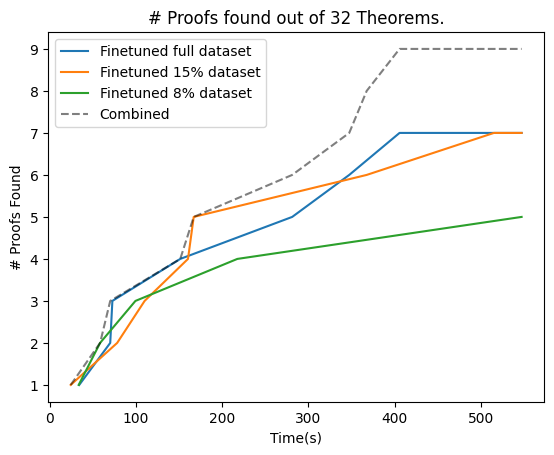

In [15]:
fig, ax = plt.subplots()
assert type(ax) == plt.Axes

plot_infos, combined_plot_info = get_matching_x_axes(eval_dicts, time_key)

for plot_info in plot_infos: 
    ax.plot(plot_info.xs, plot_info.ys, label=plot_info.name)

ax.plot(combined_plot_info.xs, combined_plot_info.ys, "--", label=combined_plot_info.name, color="black", alpha=0.5,)

ax.legend()
ax.set_xlabel("Time(s)")
ax.set_ylabel("# Proofs Found")
ax.set_title(f"# Proofs found out of {len(shared_proof_names)} Theorems.")


In [ ]:
plot_infos

[PlotInfo(xs=[31.030308816, 34.573146208, 37.464565164, 39.739862242, 51.177962115, 57.351773183, 63.003149626, 66.16931545, 72.848113706, 77.580503141, 77.925404982, 78.494323352, 86.657839192, 100.468312044, 101.739673854, 116.539942872, 131.596828116, 144.142105633, 163.131740218, 168.019398571, 272.333228349, 341.48965319, 352.07915741, 383.669839517, 402.550916893, 517.479451866, 558.802247002], ys=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27], name='Finetuned full dataset'),
 PlotInfo(xs=[23.512728814, 45.208517038, 47.820070672, 70.365249015, 72.594166389, 93.608113426, 94.935597793, 100.349959388, 103.688650547, 107.49582736, 111.243962147, 119.063340114, 135.055807082, 151.764194788, 161.465548199, 174.711020963, 177.516596546, 199.171785686, 284.646424569, 322.660828329, 365.398135796, 381.978048275, 528.683134251, 558.802247002], ys=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 23], n

[27, 23, 24]


Text(0.5, 1.0, '# Proofs Found out of 93 Theorems.')

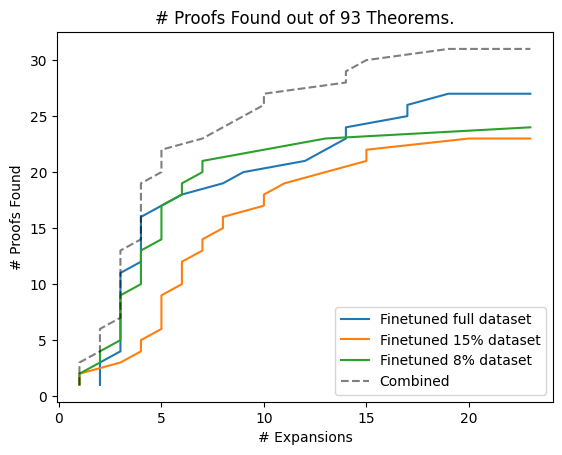

In [ ]:
fig, ax = plt.subplots()
assert type(ax) == plt.Axes

plot_infos, combined_plot_info = get_matching_x_axes(eval_dicts, expanded_key)

for plot_info in plot_infos: 
    ax.plot(plot_info.xs, plot_info.ys, label=plot_info.name)

ax.plot(combined_plot_info.xs, combined_plot_info.ys, "--", label=combined_plot_info.name, color="black", alpha=0.5,)


ax.legend()
ax.set_xlabel("# Expansions")
ax.set_ylabel("# Proofs Found")
ax.set_title(f"# Proofs Found out of {len(shared_proof_names)} Theorems.")

In [ ]:
get_fine_grained_comparison_stats(EVAL_DIRS, shared_proof_names)

Total Number of Theorems: 93.
Cardinality of union of all proofs found: 31
------------ Finetuned full dataset -----------------
Number of proofs found: 27
Dominated by: []
Number of unique proofs found: 2

------------ Finetuned 15% dataset -----------------
Number of proofs found: 23
Dominated by: []
Number of unique proofs found: 1

------------ Finetuned 8% dataset -----------------
Number of proofs found: 24
Dominated by: []
Number of unique proofs found: 0



In [ ]:
get_shortest_failed_proof(EVAL_DIRS, "/home/ubuntu/coq-modeling/failed-examples")

/home/ubuntu/coq-modeling/failed-examples exists.
